In [ ]:
#Data preprocessing: transforming the daily data into week data, generate new feature by week
#one example for city Miami
import numpy as np
import math
import pandas as pd
AW_M_ori=pd.read_excel(r'C:\Users\user\Documents\semester4\modern data analysis\project\project_heat wave\airport_weather.xlsx',sheet_name="M")
print(AW_M_ori.columns.values)
#as the desease data starts from 2014-1-4,we decide to cut-off the date before
AW_M=AW_M_ori.iloc[4:2188]
array_temp=np.array(AW_M["Average Temperature"])
list_temp=AW_M["Average Temperature"].to_list()
list_dp=AW_M["Average Dew Point"].to_list()
standard_point=np.percentile(array_temp, 95)
#according to the Conversion formula of dew point and humidity,calculate humidity
R_Humidity=[]
for i in range(len(list_temp)):
    k=((list_dp[i]*7.5)/(237.3+list_dp[i])-(7.5* 5*(list_temp[i]- 32)/9)/(237.3+ 5*(list_temp[i]- 32)/9))
    humidity=math.exp(k)
    R_Humidity.append(humidity)
print(R_Humidity)
temp_indicator=[]
for i in array_temp:
    if i>=standard_point:
        temp_indicator.append(1)
    else:
        temp_indicator.append(0)
heat_wave=[]
t=0
for i in temp_indicator:
    if i==1:        
        t=t+1
        heat_wave.append(t-1)
    else:
        t=0
        heat_wave.append(t)
AW_M['temp_indicator']=temp_indicator
AW_M['R_Humidity']=R_Humidity
AW_M['heat_wave']=heat_wave
row=AW_M.shape[0]
a=[x+1 for x in range(row//7)]
week_index= [val for val in a for i in range(7)]
print(week_index)
AW_M["Week"]=week_index
print(AW_M)
grouped=AW_M.groupby("Week")
Max_Tem=grouped["Maximum Temperature"].max()
Avg_Tem=grouped["Average Temperature"].mean()
Avg_S_Pressure=grouped["Average Station Pressure"].mean()
Avg_Visibility=grouped["Average Visibility"].mean()
Max_Wind=grouped["Maximum wind gust"].max()
Max_SWind=grouped["Maximum Sustained Wind Speed"].max()
Avg_Wind=grouped["Average Wind Speed"].mean()
Sum_Rain=grouped["Precipitation"].sum()
heat_wave_strength=grouped['heat_wave'].max()
Avg_humudity=grouped['R_Humidity'].mean()
Week_ending=pd.date_range(start = '1/11/2014',periods=312,freq = 'W-SAT')

#print(Week_ending)
Max_Tem.to_list()
Avg_Tem.to_list()
Avg_S_Pressure.to_list()
Avg_Visibility.to_list()
Max_Wind.to_list()
Max_SWind.to_list()
Avg_Wind.to_list()
Sum_Rain.to_list()
heat_wave_strength.to_list()
Avg_humudity.to_list()

AW_M_byweek=pd.DataFrame({"Max_Tem":Max_Tem,"Avg_Tem":Avg_Tem,"Avg_S_Pressure":Avg_S_Pressure,
                         "Avg_Visibility":Avg_Visibility,"Max_Wind":Max_Wind,"Max_SWind":Max_SWind,
                         "Avg_Wind":Avg_Wind,"Sum_Rain":Sum_Rain,"heat_wave_strength":heat_wave_strength,
                         "week_index":a,"Avg_humudity":Avg_humudity,
                          "Week_ending":Week_ending})

AW_M_byweek.to_csv('AW_M_byweek.csv',index=False,mode='a',encoding='utf-8-sig')




In [41]:
# Septicemia，败血症、恶性肿瘤(C00-C97)、
# Malignant neoplasms (C00-C97)，糖尿病(E10-E14)、
# Diabetes mellitus (E10-E14)，阿尔茨海默病(G30)、
# Alzheimer disease (G30)，流感和肺炎(J10-J18)、
# Influenza and pneumonia (J10-J18)，慢性下呼吸道疾病(J40-J47)、
# Chronic lower respiratory diseases (J40-J47)，其他呼吸系统疾病(J00-J06、J30-J39、J67、J70-J98)、
# Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)，肾炎、肾病综合征和肾病(N00-N07、N17-N19、N25-N27)、
# Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)，未分类的症状、体征和异常临床和实验室检查结果(R00-R99)、
# Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)，
# Diseases of heart (I00-I09,I11,I13,I20-I51)，心脏疾病(I00-I09、I11、I13、I20-I51)、
# Cerebrovascular diseases (I60-I69) 脑血管疾病(I60-I69)
import pandas as pd
Death=pd.read_csv("https://raw.githubusercontent.com/Github-cai/Modern-data-analysis_group-work/main/desease_2014-2019.csv")
AW_M_byweek=pd.read_csv('https://raw.githubusercontent.com/Github-cai/Modern-data-analysis_group-work/main/AW_M_byweek.csv')
AW_H_byweek=pd.read_csv("https://raw.githubusercontent.com/Github-cai/Modern-data-analysis_group-work/main/AW_H_byweek.csv")
AW_SF_byweek=pd.read_csv("https://raw.githubusercontent.com/Github-cai/Modern-data-analysis_group-work/main/AW_SF_byweek.csv")
AW_NY_byweek=pd.read_csv("https://raw.githubusercontent.com/Github-cai/Modern-data-analysis_group-work/main/AW_NY_byweek.csv")

Death= Death.drop(Death[Death['Week Ending Date']=="1/4/2014"].index)
AW_M_Death=Death[Death["Jurisdiction of Occurrence"]=="Florida"]
Heart_Desease=AW_M_Death["Diseases of heart (I00-I09,I11,I13,I20-I51)"].to_list()
All_death=AW_M_Death["All  Cause"].to_list()
AW_M_byweek["All_death"]=All_death
AW_M_byweek["Heart_Desease"]=Heart_Desease

AW_H_Death=Death[Death["Jurisdiction of Occurrence"]=="Texas"]
Heart_Desease=AW_H_Death["Diseases of heart (I00-I09,I11,I13,I20-I51)"].to_list()
All_death=AW_H_Death["All  Cause"].to_list()
AW_H_byweek["All_death"]=All_death
AW_H_byweek["Heart_Desease"]=Heart_Desease

AW_SF_Death=Death[Death["Jurisdiction of Occurrence"]=="California"]
Heart_Desease=AW_SF_Death["Diseases of heart (I00-I09,I11,I13,I20-I51)"].to_list()
All_death=AW_SF_Death["All  Cause"].to_list()
AW_SF_byweek["All_death"]=All_death
AW_SF_byweek["Heart_Desease"]=Heart_Desease

AW_NY_Death=Death[Death["Jurisdiction of Occurrence"]=="New York"]
Heart_Desease=AW_SF_Death["Diseases of heart (I00-I09,I11,I13,I20-I51)"].to_list()
All_death=AW_SF_Death["All  Cause"].to_list()
AW_NY_byweek["All_death"]=All_death
AW_NY_byweek["Heart_Desease"]=Heart_Desease

df_four=pd.concat([AW_M_byweek,AW_H_byweek,AW_SF_byweek,AW_NY_byweek],ignore_index=True)
df_four["Heart_Desease"]=df_four["Heart_Desease"].astype('float')
df_four["Heart_Desease"]=df_four["Heart_Desease"].astype('float')
df_four=df_four.drop(["week_index"], axis=1)
print(df_four)




      Max_Tem    Avg_Tem  Avg_S_Pressure  Avg_Visibility  Max_Wind  Max_SWind  \
0        84.9  70.571429       19.357143        9.442857      25.1       15.9   
1        84.0  66.700000       17.800000        9.914286     999.9       15.0   
2        75.9  61.642857       20.142857        9.857143     999.9       12.0   
3        82.0  71.285714       16.528571        9.100000     999.9       14.0   
4        84.0  76.557143       17.600000        9.742857      20.0       13.0   
...       ...        ...             ...             ...       ...        ...   
1243     61.0  44.985714      149.328571        9.457143     999.9       17.1   
1244     50.0  36.014286      432.285714        8.342857      29.9       15.0   
1245     57.9  42.028571      159.157143        7.428571     999.9       14.0   
1246     55.9  31.742857       15.300000        9.157143     999.9       15.0   
1247     57.0  43.428571       17.571429        9.142857     999.9       11.1   

      Avg_Wind  Sum_Rain  h

,Max_Tem,Avg_Tem,Avg_S_Pressure,Avg_Visibility,Max_Wind,Max_SWind,Avg_Wind,Sum_Rain,heat_wave_strength,Avg_humudity,All_death,Heart_Desease
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,88.769631,65.785943,30.129590,13.033986,858.313782,43.066747,26.213095,1.050625,0.241987,2.352722,4413.369391,1026.322917
std,281.061152,13.971764,65.404305,47.929600,342.804885,152.873663,132.423833,3.256332,0.982983,0.295020,711.374977,185.657174
min,30.000000,16.942857,4.628571,3.842857,18.100000,8.000000,1.642857,0.000000,0.000000,1.308387,3253.000000,688.000000
25%,73.675000,56.885714,12.353571,9.139286,999.900000,15.000000,4.953571,0.040000,0.000000,2.205217,3765.000000,863.000000
50%,84.000000,66.571429,15.014286,9.685714,999.900000,18.100000,6.485714,0.500000,0.000000,2.398026,4447.000000,1013.000000
75%,91.000000,77.171429,17.857143,9.900000,999.900000,22.900000,8.300000,1.370000,0.000000,2.564721,4909.000000,1148.000000
max,9999.900000,88.557143,999.085714,999.900000,999.900000,999.900000,999.900000,102.660000,11.000000,2.945297,7009.000000,1672.000000


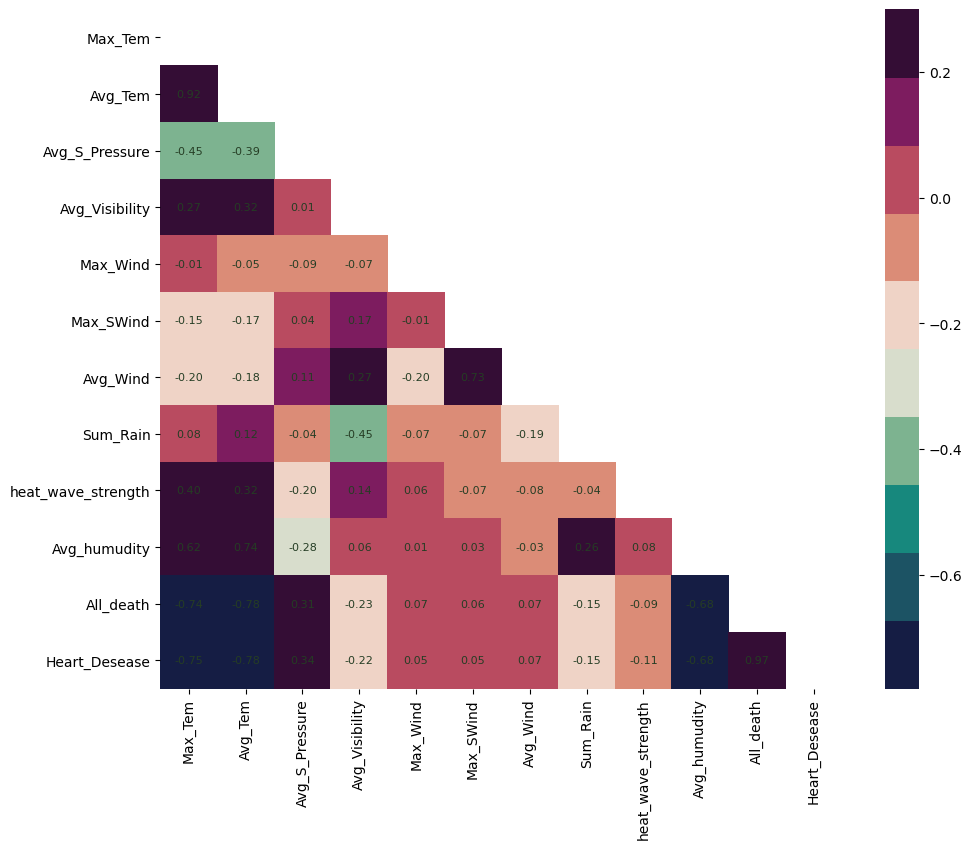

In [42]:
#descriptive analysis
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable
dcorr=df_four.corr('spearman')
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图
           )
plt.savefig("correlation_plot.jpg")
df_four.describe()


In [43]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

X = df_four.iloc[:,0:10].values
y = df_four.iloc[:,11].values



# devide the data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)


# Parameter tuning
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_test1,
                        scoring='neg_root_mean_squared_error',cv=10)
gsearch1.fit(X,y)
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print('neg_root_mean_squared_error:%f' % gsearch1.best_score_)






-382.5698155848262
{'n_estimators': 61}
neg_root_mean_squared_error:-382.569816


In [44]:

param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestRegressor(n_estimators=91),
                        param_grid = param_test2,scoring='neg_root_mean_squared_error',cv=10)
gsearch1.fit(X,y)
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)


-372.55925281217776
{'max_features': 3}
best accuracy:-372.559253


In [45]:
regressor = RandomForestRegressor(n_estimators=91, max_features=3,random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# 评估回归性能


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# regr = RandomForestRegressor(random_state=100,
#                              bootstrap=True,
#                              max_depth=2,
#                              max_features=2,
#                              min_samples_leaf=3,
#                              min_samples_split=5,
#                              n_estimators=3)
pipe = Pipeline([('reduce_dim', PCA()),
                 ('regressor', regressor)])
pipe.fit(X_train, y_train)
ypipe = pipe.predict(X_test)

dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0],
                out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

Mean Absolute Error: 222.8727912087912
Mean Squared Error: 95096.03275932858
Root Mean Squared Error: 308.37644650544985
